<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/Actividad_5_Unidad%20Pedag%C3%B3gica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 5 - ¿Cómo resolvemos problemas?**

# Código interactivo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy import signal


# **Generación de señal EEG con ruido**


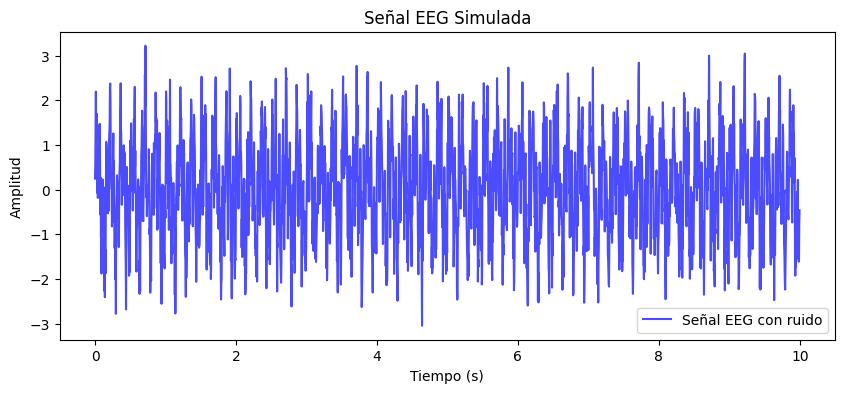

In [2]:
fs = 250  # Frecuencia de muestreo en Hz
t = np.arange(0, 10, 1/fs)  # Vector de tiempo (10 segundos)
np.random.seed(42)  # Para reproducibilidad

# Componentes de la señal EEG
theta = np.sin(2 * np.pi * 6 * t)  # Onda theta (6 Hz)
beta = np.sin(2 * np.pi * 20 * t)  # Onda beta (20 Hz)
ruido = 0.5 * np.random.randn(len(t))  # Ruido aleatorio

# Señal EEG combinada
eeg_signal = theta + beta + ruido

# Gráfica de la señal EEG en el dominio del tiempo
plt.figure(figsize=(10,4))
plt.plot(t, eeg_signal, label="Señal EEG con ruido", color='blue', alpha=0.7)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal EEG Simulada")
plt.legend()
plt.show()


# **Aplicación de la transformada rápida de Fourier (FFT)**


Momento de indagación e investigación:

- Implementar la FFT para obtener el espectro de la señal EEG.
- Visualizar el espectro de la señal en el dominio de la frecuencia.

Preguntas clave:

- ¿Cómo se calcula la frecuencia correspondiente a cada punto de la FFT?

# 💡 Implementar el código de la FFT aquí:

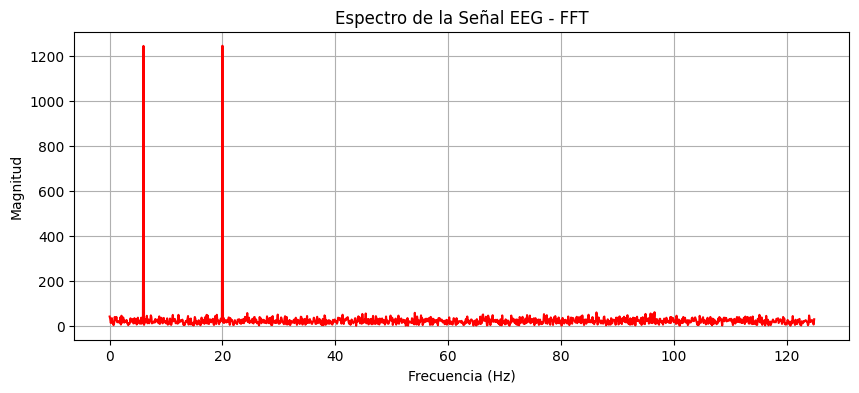

In [3]:
fft_eeg = np.fft.fft(eeg_signal) # <---- COMPLETAR
freqs = np.fft.fftfreq(len(eeg_signal), 1/fs) # <---- COMPLETAR

# 🔴 Generar la gráfica del espectro de frecuencia:
plt.figure(figsize=(10,4))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_eeg[:len(freqs)//2]), color='red')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.title("Espectro de la Señal EEG - FFT")
plt.grid()
plt.show()


# **Diseño de un filtro digital para EEG**


Momento de indagación e investigación:

- **¿Qué tipo de filtros digitales existen según su arquitectura y su respuesta en frecuencia?**
- Investigar cómo diseñar un filtro digital en Python.
- Aplicar el filtro sobre la señal EEG y visualizar los resultados.

Preguntas clave:

- **¿Qué función de SciPy permite diseñar filtros digitales?**
- **¿Cómo aplicar un filtro sin distorsionar la fase de la señal?**
- **¿Cómo afecta el orden del filtro a la respuesta en frecuencia?**

# 💡 Implementar el diseño del filtro:

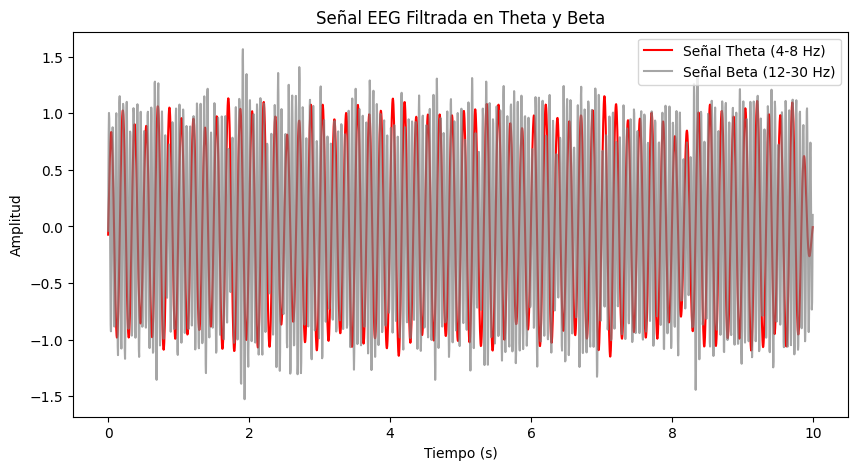

In [4]:
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs  # Frecuencia de Nyquist
    low = lowcut / nyq  # <---- COMPLETAR
    high = highcut / nyq # <---- COMPLETAR
    b, a = signal.butter(order, [low, high], btype='band')  # <---- COMPLETAR
    return b, a

def aplicar_filtro(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return signal.filtfilt(b, a, data)  # <---- COMPLETAR (usar filtfilt para aplicar el filtro)

# Aplicar filtro para aislar Theta (4-8 Hz)
eeg_theta = aplicar_filtro(eeg_signal, 4, 8, fs)

# Aplicar filtro para aislar Beta (12-30 Hz)
eeg_beta = aplicar_filtro(eeg_signal, 12, 30, fs)

# 🔴 Visualización de la señal filtrada
plt.figure(figsize=(10,5))
plt.plot(t, eeg_theta, label="Señal Theta (4-8 Hz)", color='red')
plt.plot(t, eeg_beta, label="Señal Beta (12-30 Hz)", color='gray', alpha=0.7)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal EEG Filtrada en Theta y Beta")
plt.legend()
plt.show()


# **Validación del filtrado**

Preguntas orientadoras:

- ¿Qué información pueden extraer al visualizar el espectro de la señal filtrada y compararlo con la señal original?
- ¿Cómo pueden verificar si la transformada de Fourier muestra correctamente la atenuación de las frecuencias no deseadas?

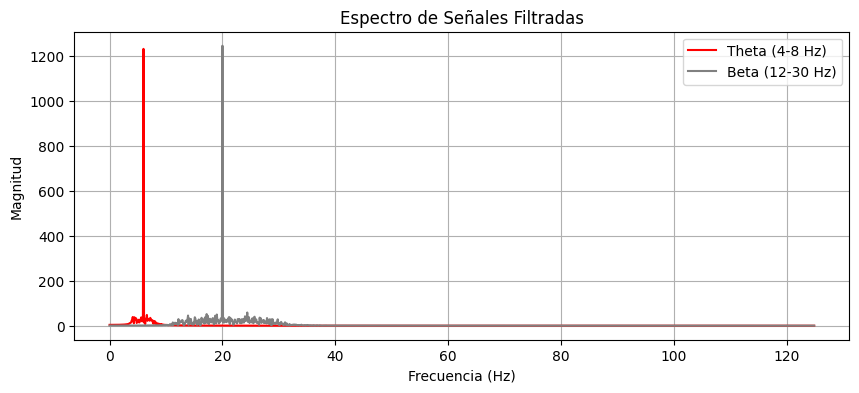

In [5]:
fft_theta = np.fft.fft(eeg_theta)
fft_beta = np.fft.fft(eeg_beta)

# 🔴 Generar la gráfica del espectro después del filtrado
plt.figure(figsize=(10,4))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_theta[:len(freqs)//2]), label="Theta (4-8 Hz)", color='red')
plt.plot(freqs[:len(freqs)//2], np.abs(fft_beta[:len(freqs)//2]), label="Beta (12-30 Hz)", color='gray')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.title("Espectro de Señales Filtradas")
plt.legend()
plt.grid()
plt.show()